In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from Yahoo Finance
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

# For time stamps
from datetime import datetime

# List of Indian stock symbols for Reliance, SBI, HDFC Bank, and TCS
tech_list = ['RELIANCE.BO', 'SBIN.BO', 'HDFCBANK.BO', 'TCS.BO']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Fetching data for the companies
company_list = []
company_name = ['RELIANCE', 'SBIN', 'HDFCBANK', 'TCS']

for stock, name in zip(tech_list, company_name):
    df = yf.download(stock, start, end)
    df["company_name"] = name
    company_list.append(df)

# Concatenating data for all companies into a single DataFrame
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-11-03,3387.399902,3387.399902,3345.949951,3350.850098,3350.850098,124559,TCS
2023-11-06,3364.000000,3393.649902,3360.000000,3385.350098,3385.350098,14209,TCS
2023-11-07,3385.000000,3404.550049,3366.050049,3370.100098,3370.100098,38446,TCS
2023-11-08,3377.949951,3402.000000,3371.850098,3380.750000,3380.750000,68334,TCS
2023-11-09,3391.000000,3392.500000,3343.000000,3348.250000,3348.250000,35061,TCS
2023-11-10,3343.949951,3347.000000,3322.350098,3332.800049,3332.800049,253510,TCS
2023-11-13,3350.000000,3357.000000,3327.000000,3331.699951,3331.699951,32989,TCS
2023-11-15,3385.100098,3413.000000,3360.000000,3399.300049,3399.300049,128174,TCS
2023-11-16,3467.000000,3529.000000,3415.500000,3498.000000,3498.000000,169895,TCS


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,348.950012,354.750000,343.774994,353.475006,310.364502,2183050
2012-01-03,356.000000,362.950012,355.299988,361.850006,317.718079,1656136
2012-01-04,363.950012,365.450012,356.750000,358.000000,314.337646,1862362
2012-01-05,357.700012,362.424988,347.625000,349.625000,306.984070,2555080
2012-01-06,349.000000,361.799988,348.250000,358.450012,314.732758,2059878


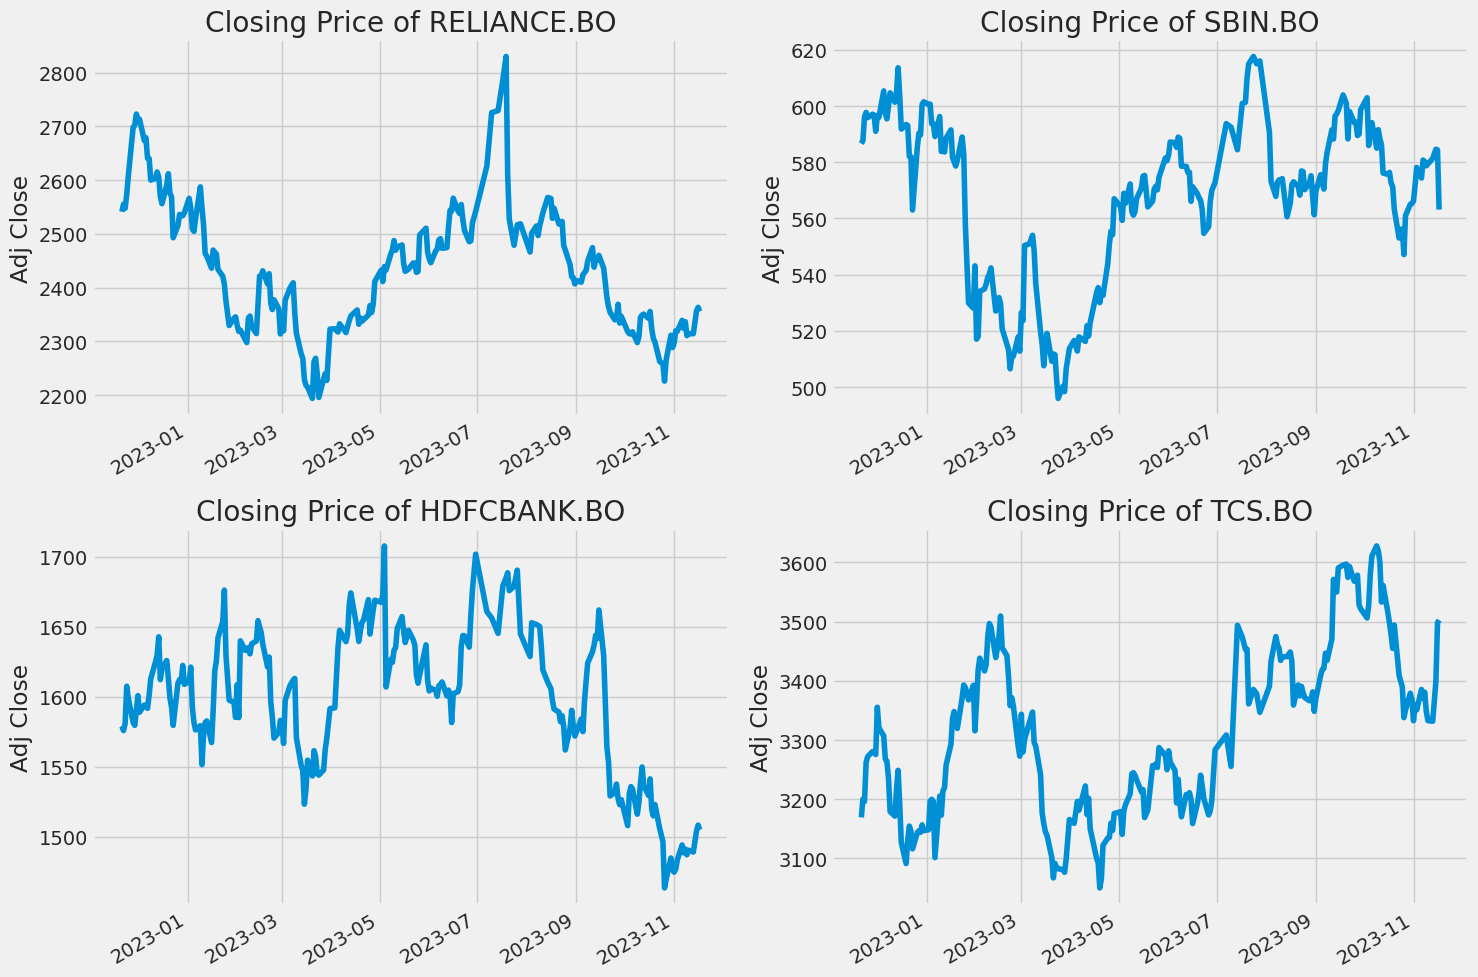

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

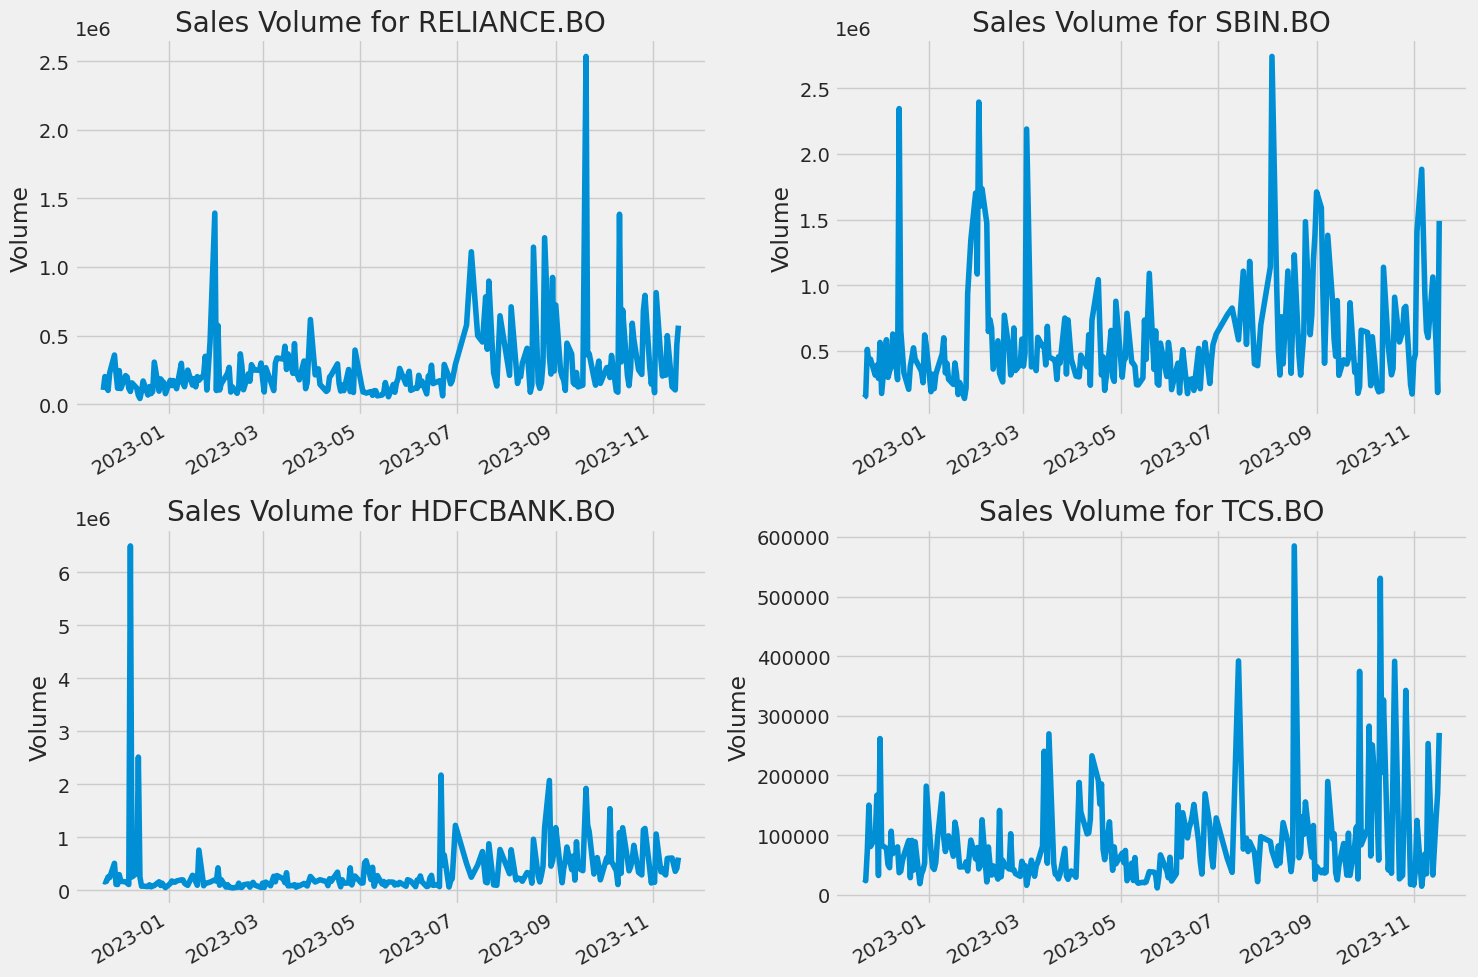

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

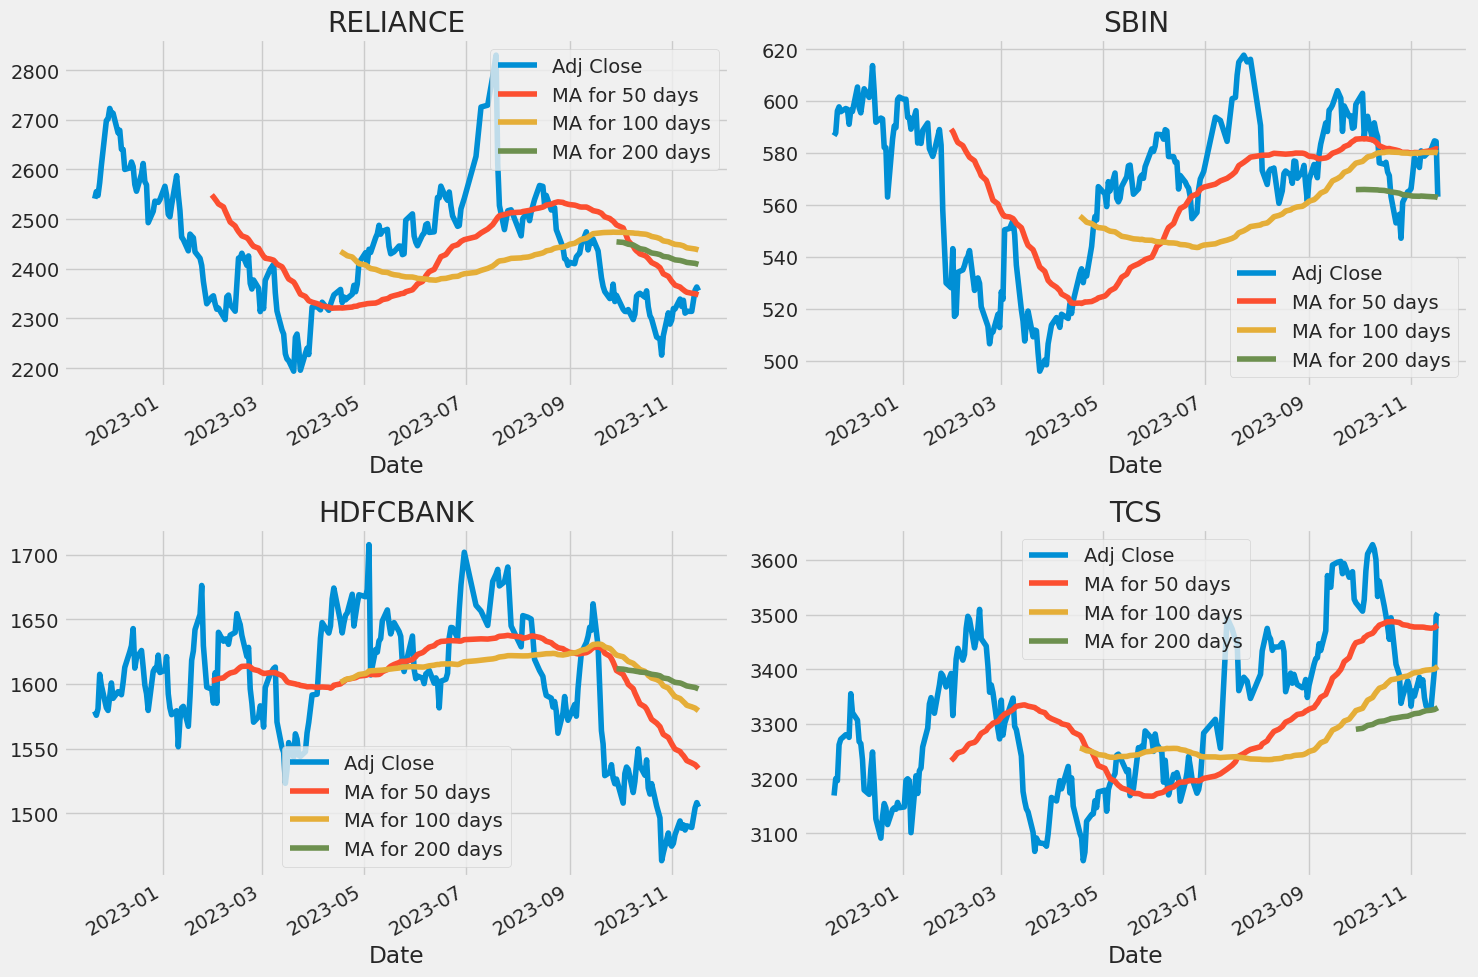

In [ ]:
ma_day = [50,100,200]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

# Plotting the data
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

for idx, (company, name) in enumerate(zip(company_list, company_name)):
    i, j = divmod(idx, 2)
    ax = axes[i, j]
    company[['Adj Close','MA for 50 days','MA for 100 days','MA for 200 days']].plot(ax=ax)
    ax.set_title(name)

fig.tight_layout()
plt.show()

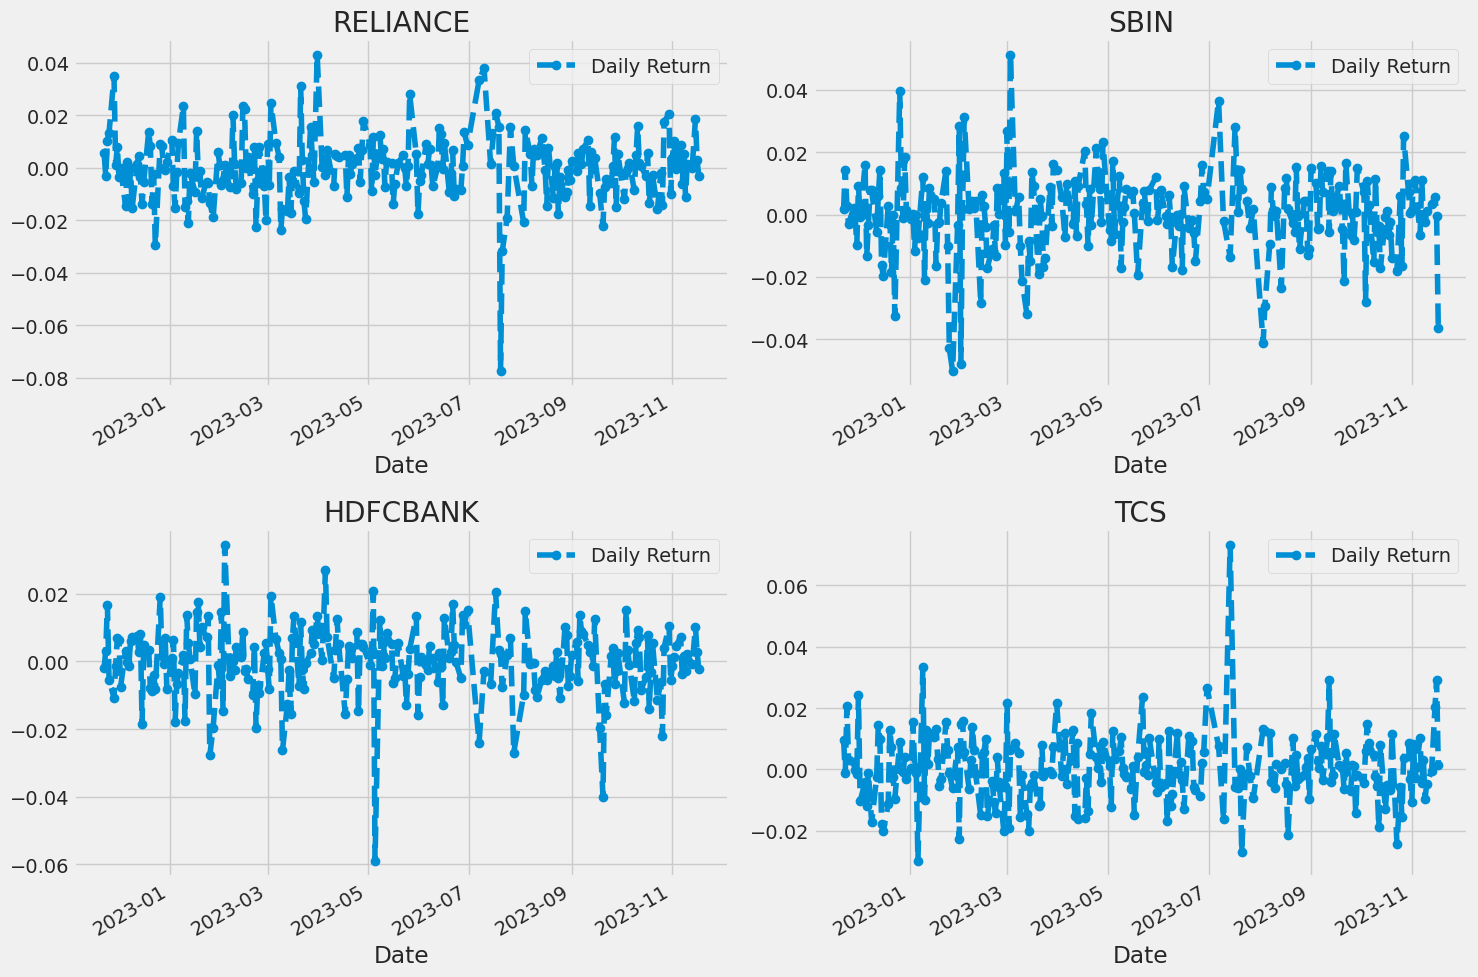

In [ ]:
# Calculate daily returns for all companies in company_list
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Plot the daily return percentage for the updated companies
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

for idx, (company, name) in enumerate(zip(company_list, company_name)):
    i, j = divmod(idx, 2)
    ax = axes[i, j]
    company['Daily Return'].plot(ax=ax, legend=True, linestyle='--', marker='o')
    ax.set_title(name)

fig.tight_layout()
plt.show()


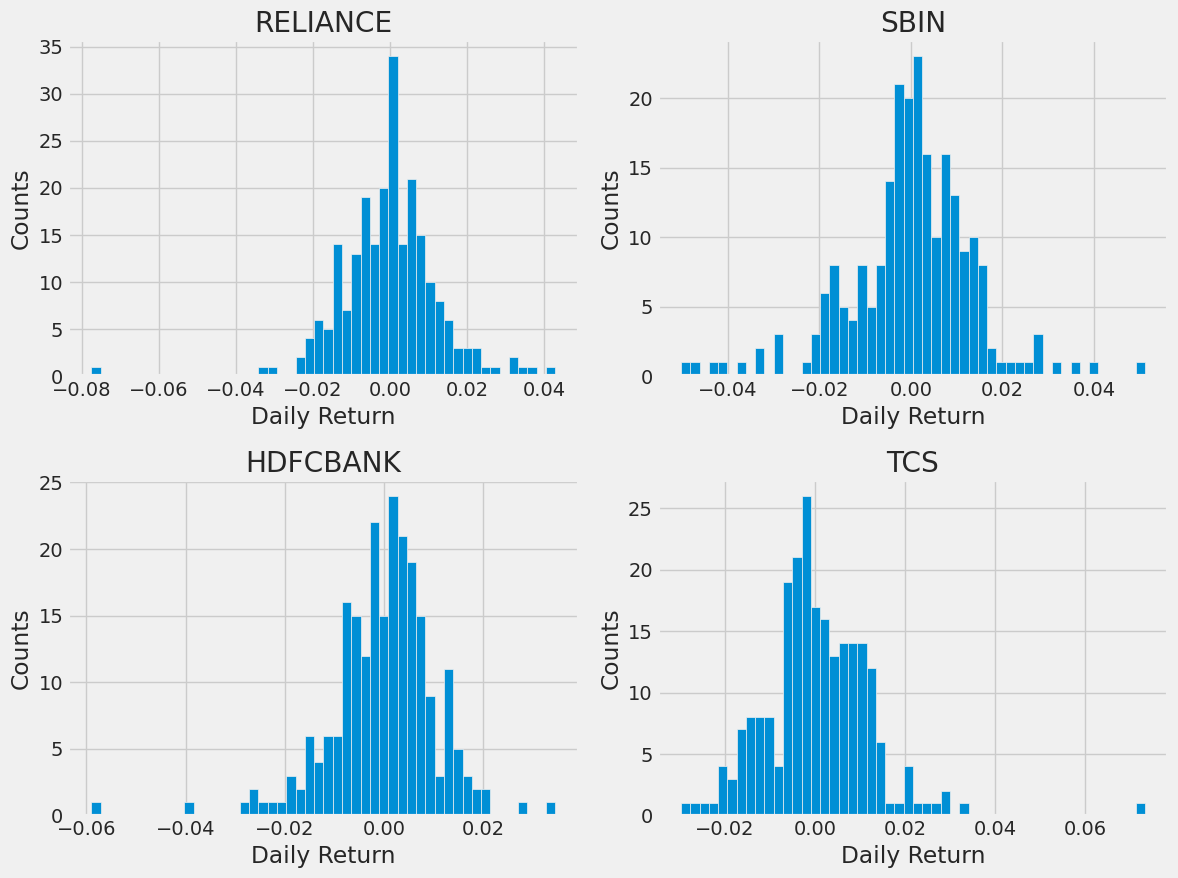

In [ ]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

**Correlation between different stocks closing prices**

In [ ]:

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


,HDFCBANK.BO,RELIANCE.BO,SBIN.BO,TCS.BO
Date,,,,
2022-11-21,NaN,NaN,NaN,NaN
2022-11-22,-0.001941,0.005588,0.001756,0.009734
2022-11-23,0.003200,-0.003061,0.014438,-0.001162
2022-11-24,0.016823,0.010210,0.002633,0.020572
2022-11-25,-0.005351,0.013359,-0.003118,0.003064


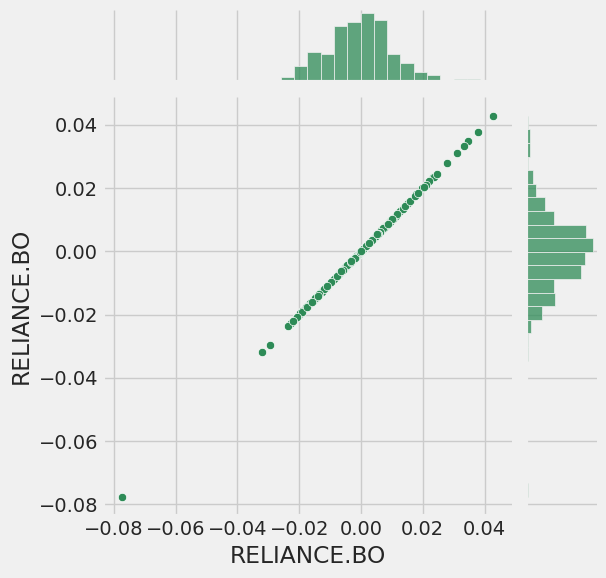

In [ ]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='RELIANCE.BO', y='RELIANCE.BO', data=tech_rets, kind='scatter', color='seagreen')

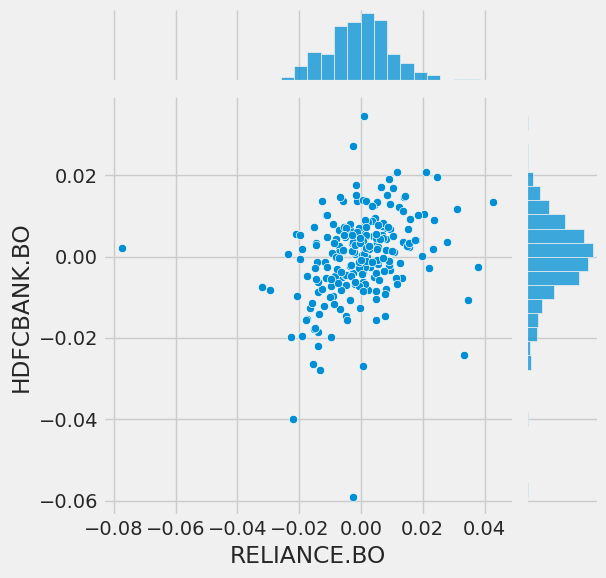

In [ ]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='RELIANCE.BO', y='HDFCBANK.BO', data=tech_rets, kind='scatter')


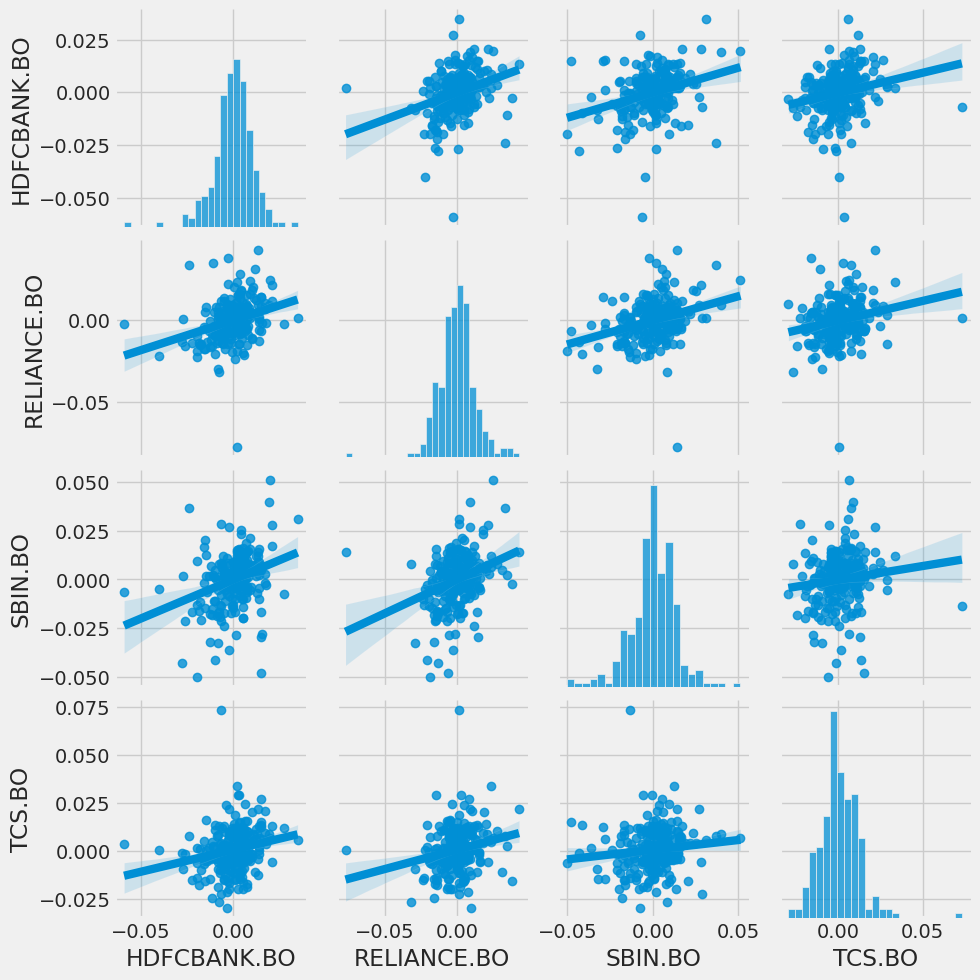

In [ ]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

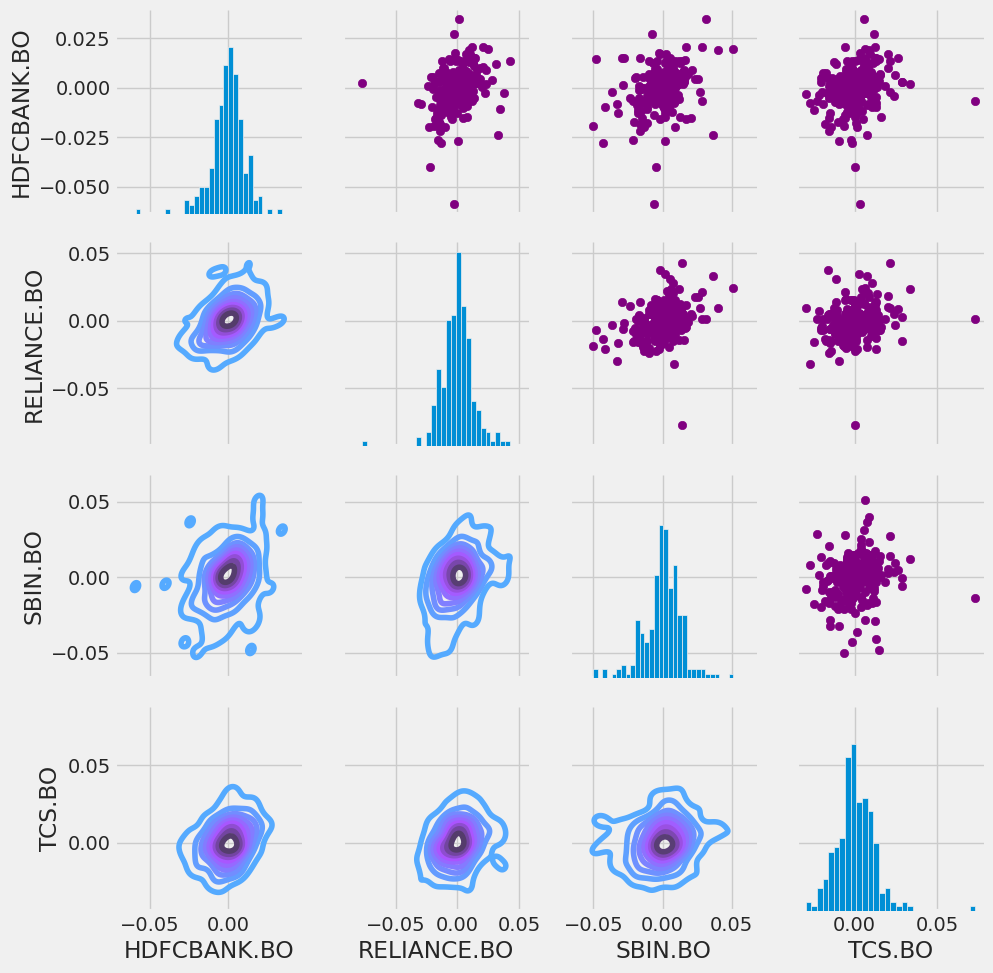

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

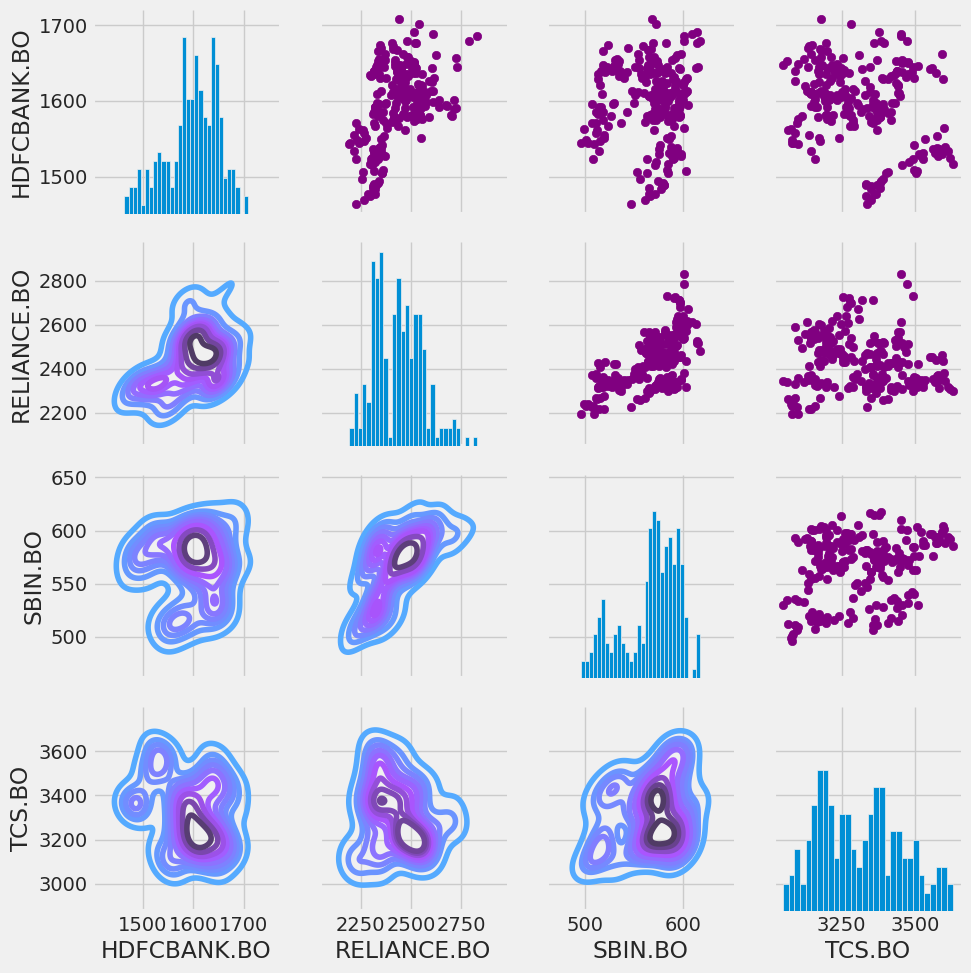

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

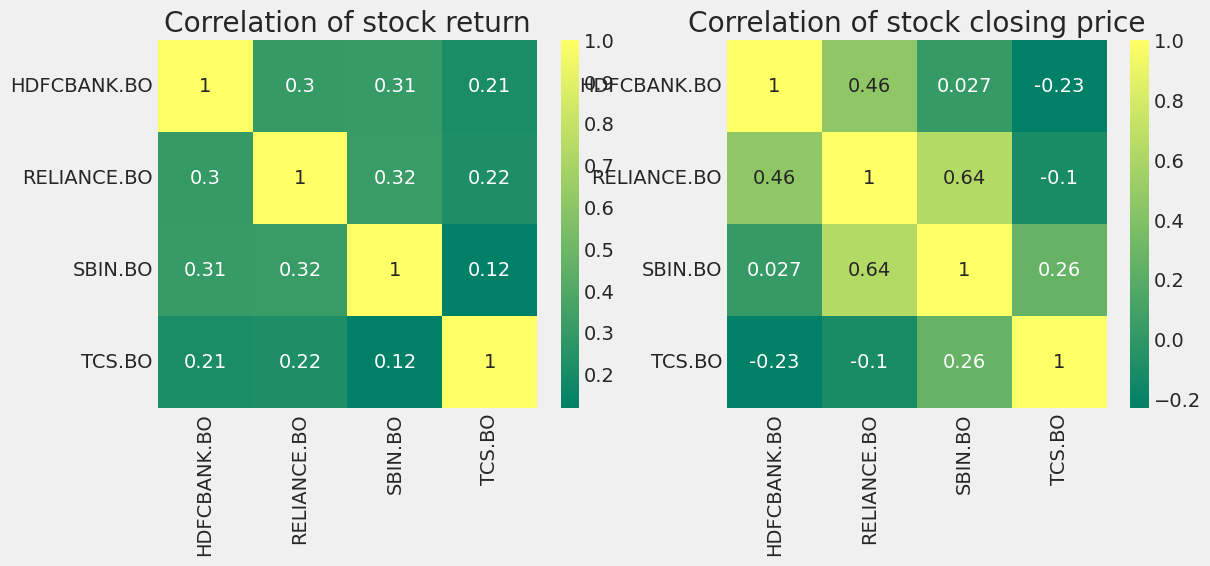

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

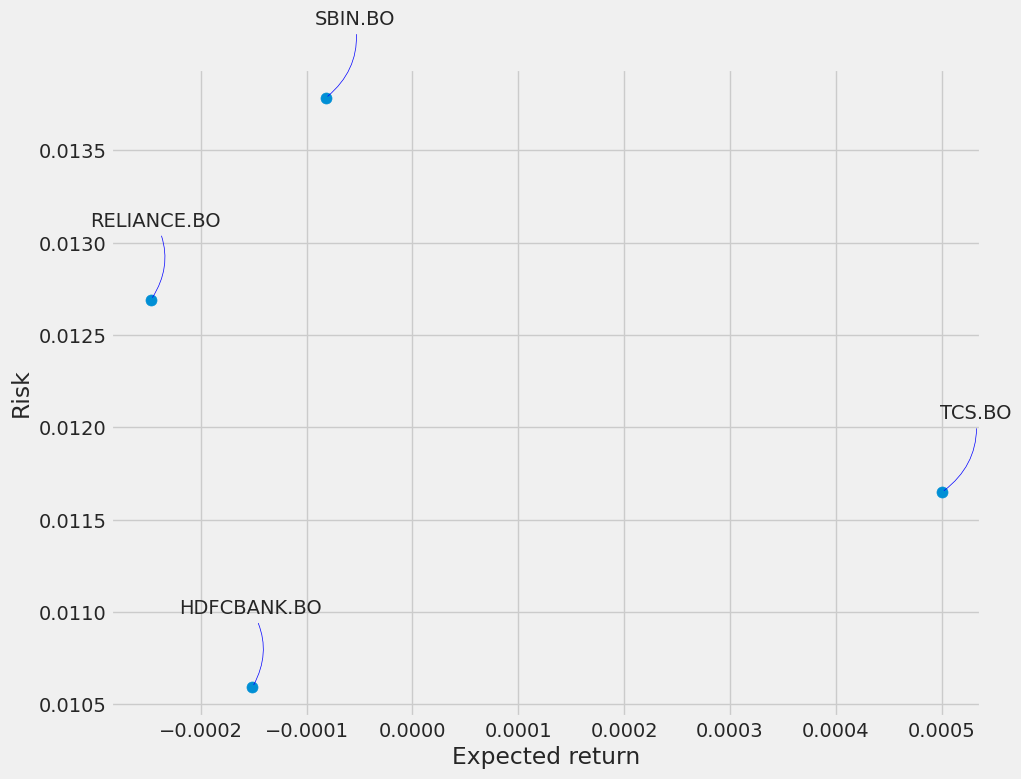

In [ ]:

rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [ ]:
# Get the stock quote
df = pdr.get_data_yahoo('RELIANCE.BO', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,348.950012,354.750000,343.774994,353.475006,310.364502,2183050
2012-01-03,356.000000,362.950012,355.299988,361.850006,317.718079,1656136
2012-01-04,363.950012,365.450012,356.750000,358.000000,314.337646,1862362
2012-01-05,357.700012,362.424988,347.625000,349.625000,306.984070,2555080
2012-01-06,349.000000,361.799988,348.250000,358.450012,314.732758,2059878
...,...,...,...,...,...,...
2023-11-10,2308.000000,2317.000000,2298.149902,2314.300049,2314.300049,499796
2023-11-13,2325.000000,2325.000000,2311.649902,2314.300049,2314.300049,127884
2023-11-15,2335.500000,2362.350098,2326.800049,2356.899902,2356.899902,104539


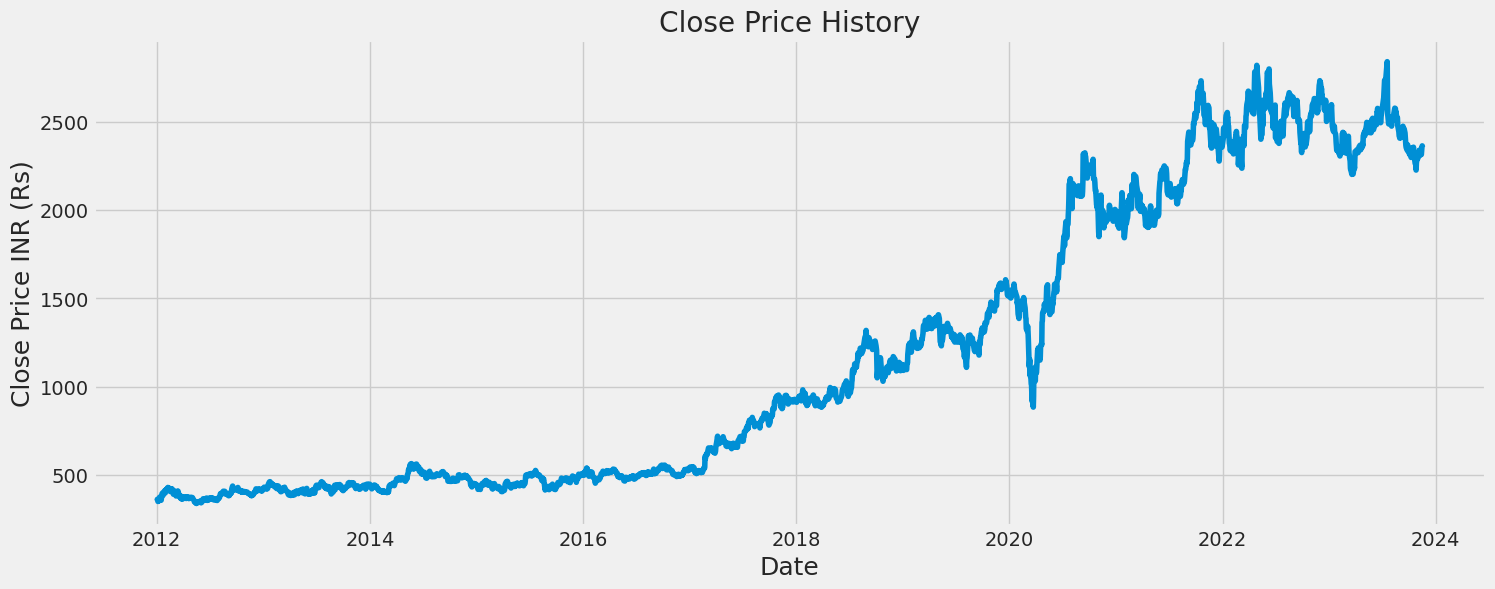

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR (Rs)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2764

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00614533],
       [0.00949279],
       [0.00795395],
       ...,
       [0.80690671],
       [0.80948483],
       [0.80648711]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# x_train.shape

[array([0.00614533, 0.00949279, 0.00795395, 0.0046065 , 0.00813382,
       0.00614533, 0.01178105, 0.01441903, 0.01226068, 0.01116151,
       0.00743435, 0.01282025, 0.02012471, 0.02177345, 0.0234122 ,
       0.0189456 , 0.02137376, 0.02276269, 0.02825852, 0.02383189,
       0.02782885, 0.03079659, 0.03045685, 0.03228546, 0.03128622,
       0.0336844 , 0.03634238, 0.0352632 , 0.0331648 , 0.03436389,
       0.03436389, 0.03194572, 0.02716935, 0.02831848, 0.03309484,
       0.03137615, 0.0323554 , 0.0288081 , 0.02098405, 0.02395179,
       0.02846837, 0.02680962, 0.02760901, 0.02737919, 0.02432152,
       0.02004476, 0.01703705, 0.0194652 , 0.02413166, 0.02846837,
       0.02759902, 0.02435149, 0.01913546, 0.01572805, 0.01682721,
       0.018416  , 0.01205084, 0.0135497 , 0.01071185, 0.01089172])]
[0.009942443767010617]

[array([0.00614533, 0.00949279, 0.00795395, 0.0046065 , 0.00813382,
       0.00614533, 0.01178105, 0.01441903, 0.01226068, 0.01116151,
       0.00743435, 0.01282025, 0.0

In [ ]:

from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2704/2704 [==============================] - 150s 54ms/step - loss: 0.0014


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 0s 58ms/step


177.34088037266685

<ipython-input-70-3239b970dfd6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


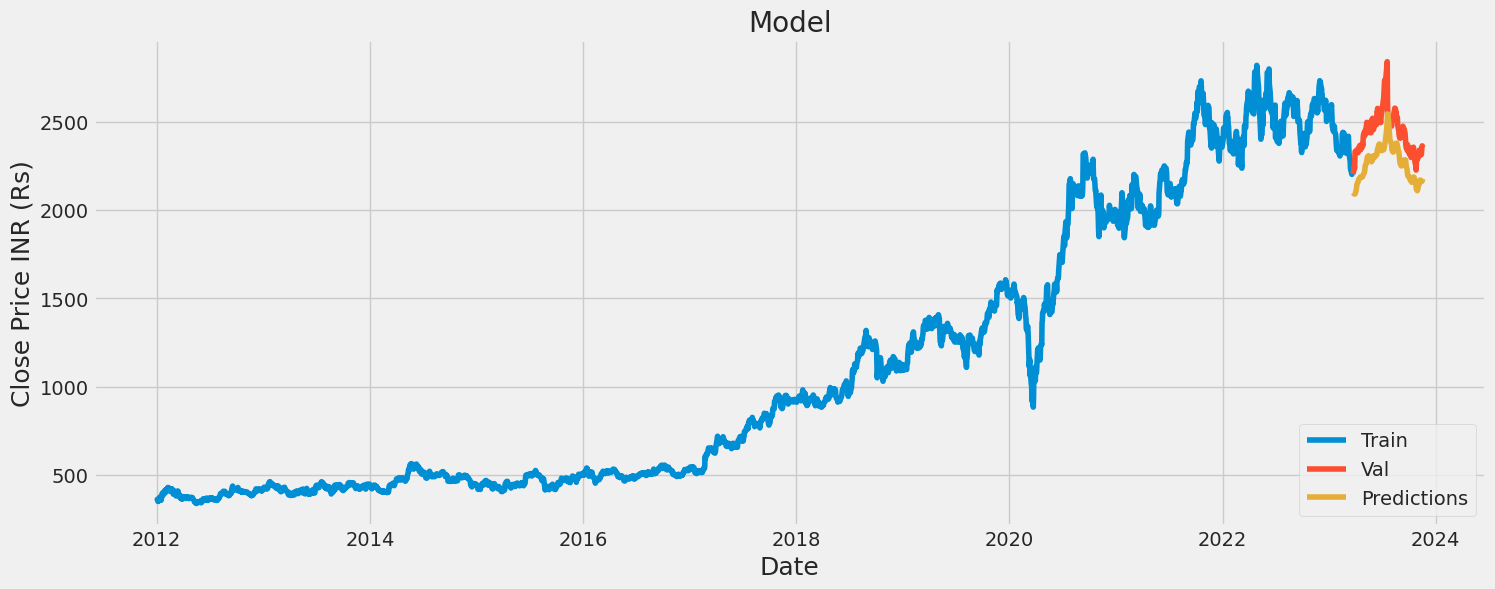

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR (Rs)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-03-24,2203.500000,2097.981934
2023-03-27,2237.500000,2093.007080
2023-03-28,2247.949951,2090.777344
2023-03-29,2235.250000,2091.608154
2023-03-31,2331.050049,2091.204834
...,...,...
2023-11-10,2314.300049,2168.609619
2023-11-13,2314.300049,2165.714600
2023-11-15,2356.899902,2162.499023


In [ ]:
model.save('Stock Predictions Model.keras')

In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.83.252.81


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501


/bin/bash: line 1: streamlit: command not found
npx: installed 22 in 3.522s
your url is: https://rude-snakes-peel.loca.lt
^C
